In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Learning Curves

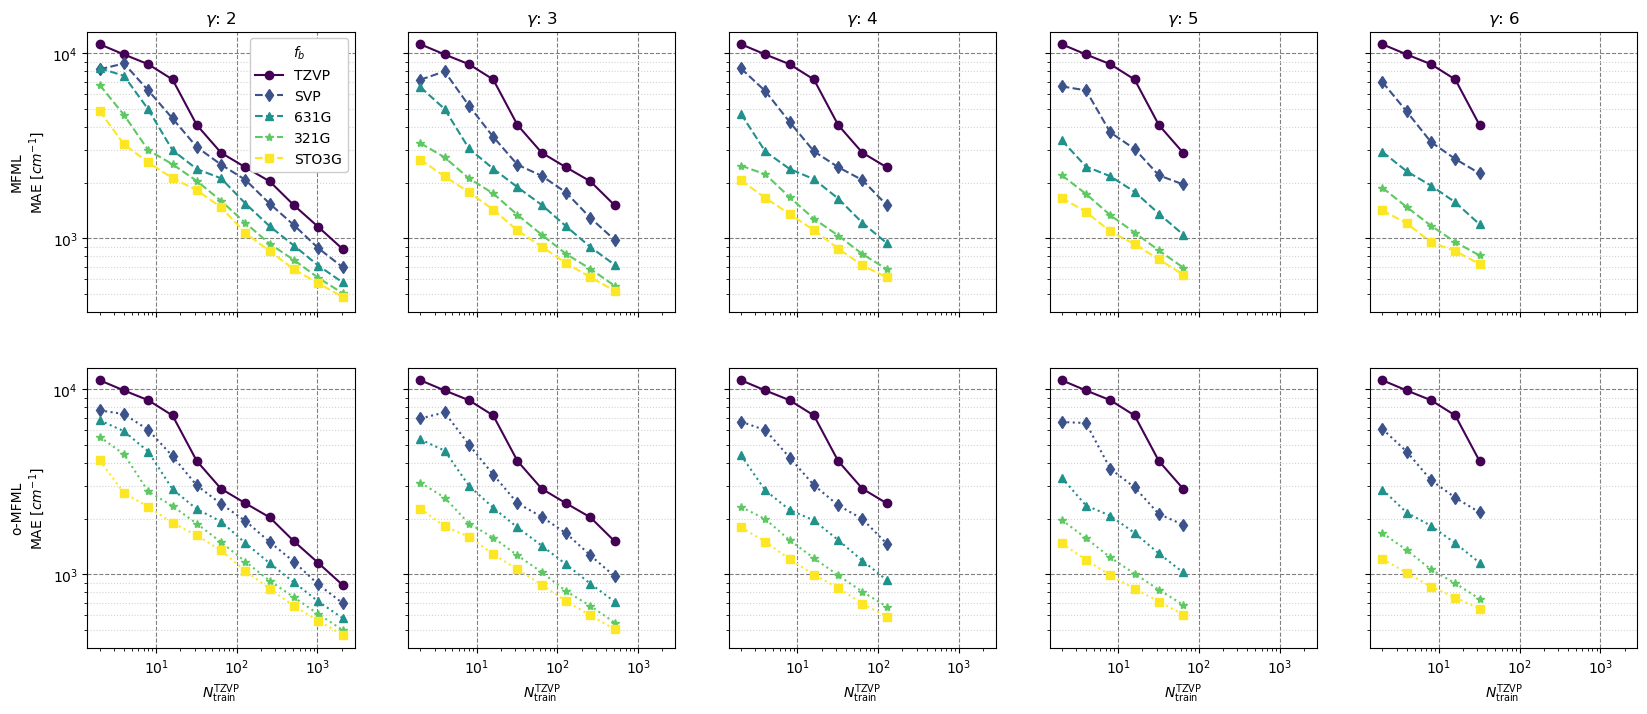

In [2]:
def multiple_factor_LCs(rep='CM',prop='SCF',unit='hE',yti=None):
    sf = np.load(f'outs/sf_mae_{prop}_{rep}.npy')
    n_sf = 2**np.arange(1,1+sf.shape[0])
    
    fids = ['STO3G','321G','631G','SVP','TZVP']
    markers=['s','*','^','d','o']
    colors = plt.cm.viridis(np.linspace(0,1,5))
    
    fig,ax = plt.subplots(2,5,figsize=(20,8),sharey=True, sharex=True)
    ax=ax.flatten('C')
    
    for i in range(2,7):
        mae_def = np.load(f'outs/def_mae_{prop}_{rep}_{i}.npy',allow_pickle=True)
        mae_OLS = np.load(f'outs/ols_mae_{prop}_{rep}_{i}.npy',allow_pickle=True)
        n = 2**np.arange(1,1+mae_OLS[0].shape[0])
        ax[i-2].loglog(n_sf[:n.shape[0]],sf[:n.shape[0]],marker=markers[-1],color=colors[0],label='TZVP')
        ax[i-2+5].loglog(n_sf[:n.shape[0]],sf[:n.shape[0]],marker=markers[-1],color=colors[0])
        ax[i-2].set_title('$\gamma$: '+str(i))
        for j in range(3,-1,-1):
            ax[i-2].loglog(n,mae_def[j],marker=markers[j],color=colors[4-j],linestyle='--',label=fids[j])
            ax[i-2+5].loglog(n,mae_OLS[j],marker=markers[j],color=colors[4-j],linestyle=':',label=fids[j])
        
            
    ax[0].legend(title='$f_b$',frameon=1.0, framealpha=1.0)
    y_minor = mticker.LogLocator(base = 2,subs=[5,15,50],numticks=8)#np.arange(1.0,5,2), numticks = 5)
    y_major = mticker.LogLocator(base = 10,subs=[1,10,100],numticks=3)#np.arange(1.0,8,4), numticks = 10)
    
    for i in range(10):
        #ax[i].xaxis.set_major_formatter(mticker.ScalarFormatter())
        #ax[i].set_xticks([2,8,32,128,512])
        #ax[i].yaxis.set_minor_formatter(mticker.ScalarFormatter())
        #ax[i].yaxis.set_major_formatter(mticker.ScalarFormatter())
        #ax[i].yaxis.set_minor_locator(y_minor)
        #ax[i].yaxis.set_major_locator(y_major)
        #ax[i].set_yticks(yti,minor=True)
        ax[i].grid(True, axis='both',which="major", ls="--",color='gray')
        ax[i].grid(True, axis='y', which="minor", ls=":",color='lightgray')
        #ax[i].yaxis.set_tick_params(labelleft=True,which='both')
        if i>4:
            ax[i].set_xlabel('$N_{\mathrm{train}}^{\mathrm{TZVP}}$')
    ax[0].set_ylabel(f'MFML\nMAE [${unit}$]')
    ax[5].set_ylabel(f'o-MFML\nMAE [${unit}$]')



multiple_factor_LCs(rep='CM',prop='EV',unit='cm^{-1}')
#plt.savefig('plots/SCF_ScalingFactor_LC.pdf',format='pdf',bbox_inches='tight',dpi=150)

# Ratio of times of subsequent fidelities

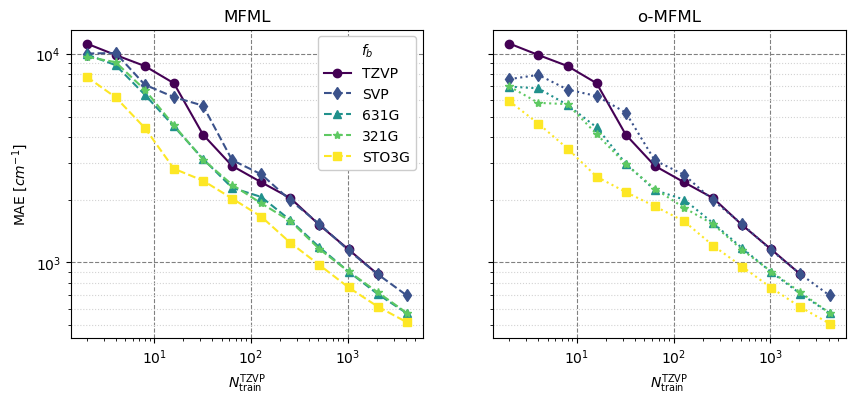

In [3]:
def LC_ffm1(prop='EV',rep='CM',unit='cm^{-1}'):
    fig,ax = plt.subplots(1,2,figsize=(10,4),sharey=True)
    sf = np.load(f'outs/sf_mae_{prop}_{rep}.npy')
    n_sf = 2**np.arange(1,1+sf.shape[0])
    
    fids = ['STO3G','321G','631G','SVP','TZVP']
    markers=['s','*','^','d','o']
    colors = plt.cm.viridis(np.linspace(0,1,5))
    
    ffm1_def = np.load(f'outs/def_mae_{prop}_{rep}_ffm1ratio.npy',allow_pickle=True)
    ffm1_ols = np.load(f'outs/ols_mae_{prop}_{rep}_ffm1ratio.npy',allow_pickle=True)
    
    n = 2**np.arange(1,1+ffm1_ols[0].shape[0])
    
    ax[0].loglog(n_sf[:n.shape[0]],sf[:n.shape[0]],marker=markers[-1],color=colors[0],label='TZVP')
    ax[1].loglog(n_sf[:n.shape[0]],sf[:n.shape[0]],marker=markers[-1],color=colors[0],label='TZVP')
    
    for j in range(3,-1,-1):
        ax[0].loglog(n,ffm1_def[j],marker=markers[j],color=colors[4-j],linestyle='--',label=fids[j])
        ax[1].loglog(n,ffm1_ols[j],marker=markers[j],color=colors[4-j],linestyle=':',label=fids[j])
        
    ax[0].legend(title='$f_b$',frameon=1.0, framealpha=1.0)
    for i in range(2):
        ax[i].grid(True, axis='both',which="major", ls="--",color='gray')
        ax[i].grid(True, axis='y', which="minor", ls=":",color='lightgray')
        ax[i].set_xlabel('$N_{\mathrm{train}}^{\mathrm{TZVP}}$')
    ax[0].set_ylabel(f'MAE [${unit}$]')
    ax[0].set_title('MFML')
    ax[1].set_title('o-MFML')
LC_ffm1()
#plt.savefig('plots/ffm1_timebased_EV_LC.pdf',format='pdf',bbox_inches='tight',dpi=150)

# Top fidelity based scaling factors

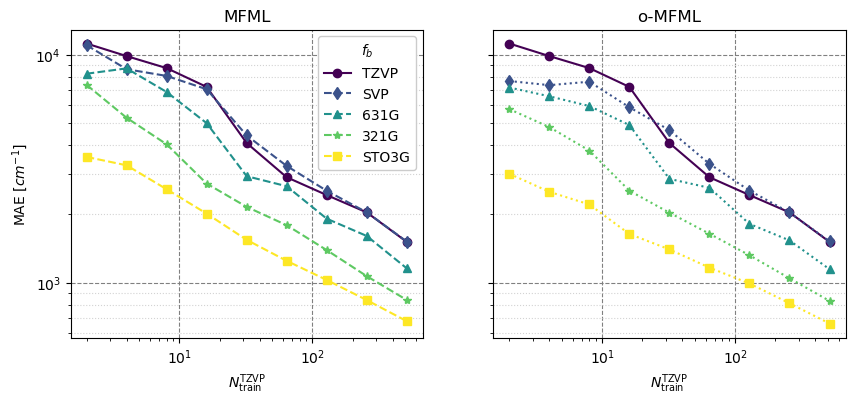

In [4]:
def LC_top_based(prop='EV',rep='CM',unit='cm^{-1}'):
    fig,ax = plt.subplots(1,2,figsize=(10,4),sharey=True)
    sf = np.load(f'outs/sf_mae_{prop}_{rep}.npy')
    n_sf = 2**np.arange(1,1+sf.shape[0])
    
    fids = ['STO3G','321G','631G','SVP','TZVP']
    markers=['s','*','^','d','o']
    colors = plt.cm.viridis(np.linspace(0,1,5))
    
    ffm1_def = np.load(f'outs/def_mae_{prop}_{rep}_targetratio.npy',allow_pickle=True)
    ffm1_ols = np.load(f'outs/ols_mae_{prop}_{rep}_targetratio.npy',allow_pickle=True)
    
    n = 2**np.arange(1,1+ffm1_ols[0].shape[0])
    
    ax[0].loglog(n_sf[:n.shape[0]],sf[:n.shape[0]],marker=markers[-1],color=colors[0],label='TZVP')
    ax[1].loglog(n_sf[:n.shape[0]],sf[:n.shape[0]],marker=markers[-1],color=colors[0],label='TZVP')
    
    for j in range(3,-1,-1):
        ax[0].loglog(n,ffm1_def[j],marker=markers[j],color=colors[4-j],linestyle='--',label=fids[j])
        ax[1].loglog(n,ffm1_ols[j],marker=markers[j],color=colors[4-j],linestyle=':',label=fids[j])
        
    ax[0].legend(title='$f_b$',frameon=1.0, framealpha=1.0)
    for i in range(2):
        ax[i].grid(True, axis='both',which="major", ls="--",color='gray')
        ax[i].grid(True, axis='y', which="minor", ls=":",color='lightgray')
        ax[i].set_xlabel('$N_{\mathrm{train}}^{\mathrm{TZVP}}$')
    ax[0].set_ylabel(f'MAE [${unit}$]')
    ax[0].set_title('MFML')
    ax[1].set_title('o-MFML')
LC_top_based()
#plt.savefig('plots/targetfid_timebased_EV_LC.pdf',format='pdf',bbox_inches='tight',dpi=150)

# LC comparison

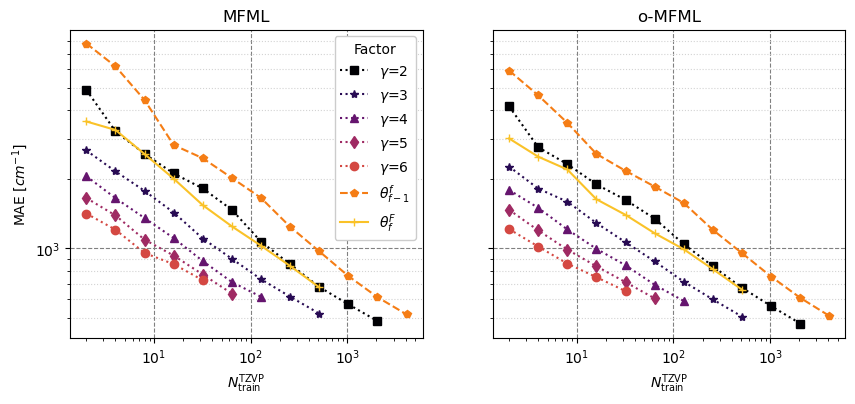

In [5]:
def LC_comparison_plots(prop='EV',rep='CM',unit='cm^{-1}'):
    fig,ax = plt.subplots(1,2,figsize=(10,4),sharey=True)
    sf = np.load(f'outs/sf_mae_{prop}_{rep}.npy')
    
    markers=['s','*','^','d','o','p','+']
    colors = plt.cm.inferno(np.linspace(0,1,8))#[::-1]
    
    ax[0].set_title('MFML')
    ax[1].set_title('o-MFML')
    
    
    n_sf = 2**np.arange(1,1+sf.shape[0])
    
    #ax[0].loglog(n_sf,sf,marker=markers[0],color=colors[0],label='KRR (TZVP)',linestyle=':')
    #ax[1].loglog(n_sf,sf,marker=markers[0],color=colors[0],label='KRR (TZVP)',linestyle=':')
    
    for i in range(2,7):
        mae_def = np.load(f'outs/def_mae_{prop}_{rep}_{i}.npy',allow_pickle=True)[0]
        mae_OLS = np.load(f'outs/ols_mae_{prop}_{rep}_{i}.npy',allow_pickle=True)[0]
        n = 2**np.arange(1,1+mae_OLS.shape[0])
        ax[0].loglog(n,mae_def,marker=markers[i-2],color=colors[i-2],linestyle=':',label=r'$\gamma$='+str(i))
        ax[1].loglog(n,mae_OLS,marker=markers[i-2],color=colors[i-2],linestyle=':',label=r'$\gamma$='+str(i))
    
    
    ffm1_def = np.load(f'outs/def_mae_{prop}_{rep}_ffm1ratio.npy',allow_pickle=True)[0]
    ffm1_ols = np.load(f'outs/ols_mae_{prop}_{rep}_ffm1ratio.npy',allow_pickle=True)[0]
    
    fF_def = np.load(f'outs/def_mae_{prop}_{rep}_targetratio.npy',allow_pickle=True)[0]
    fF_ols = np.load(f'outs/ols_mae_{prop}_{rep}_targetratio.npy',allow_pickle=True)[0]
    
    n_ffm1 = 2**np.arange(1,1+ffm1_ols.shape[0])
    n_fF = 2**np.arange(1,1+fF_ols.shape[0])
    
    ax[0].loglog(n_ffm1,ffm1_def,marker=markers[5],color=colors[5],label=r'$\theta_{f-1}^f$',linestyle='--')
    ax[1].loglog(n_ffm1,ffm1_ols,marker=markers[5],color=colors[5],label=r'$\theta_{f-1}^f$',linestyle='--')
    
    ax[0].loglog(n_fF,fF_def,marker=markers[6],color=colors[6],label=r'$\theta_{f}^F$',linestyle='-')
    ax[1].loglog(n_fF,fF_ols,marker=markers[6],color=colors[6],label=r'$\theta_{f}^F$',linestyle='-')
    
    ax[0].legend(title='Factor',frameon=1.0, framealpha=1.0,ncol=1)
    
    for i in range(2):
        ax[i].grid(True, axis='both',which="major", ls="--",color='gray')
        ax[i].grid(True, axis='y', which="minor", ls=":",color='lightgray')
        ax[i].set_xlabel('$N_{\mathrm{train}}^{\mathrm{TZVP}}$')
    ax[0].set_ylabel(f'MAE [${unit}$]')
    
LC_comparison_plots()
#plt.savefig('plots/LC_comparison_plots.pdf',format='pdf',bbox_inches='tight',dpi=150.0)

In [6]:
def print_maes():
    for i in range(2,7):
        mfml = np.load(f'outs/def_mae_EV_CM_{i}.npy',allow_pickle=True)
        omfml = np.load(f'outs/ols_mae_EV_CM_{i}.npy',allow_pickle=True)
        print(f'fac:{i}; MFML:',mfml[1][4], ' o-MFML: ',omfml[1][4])
    
    mfml = np.load('outs/def_mae_EV_CM_ffm1ratio.npy',allow_pickle=True)
    omfml = np.load('outs/ols_mae_EV_CM_ffm1ratio.npy',allow_pickle=True)
    print('theta_{f-1}^f; MFML:',mfml[1][4], ' o-MFML: ',omfml[1][4])
    
    mfml = np.load('outs/def_mae_EV_CM_targetratio.npy',allow_pickle=True)
    omfml = np.load('outs/ols_mae_EV_CM_targetratio.npy',allow_pickle=True)
    print('theta_{f}^F; MFML:',mfml[1][4], ' o-MFML: ',omfml[1][4])
    
print_maes()

fac:2; MFML: 2044.352671930467  o-MFML:  1879.137848973744
fac:3; MFML: 1339.4485512687286  o-MFML:  1266.7825365131932
fac:4; MFML: 1036.3573498134942  o-MFML:  988.0525321051813
fac:5; MFML: 860.3274613548172  o-MFML:  825.7838997856755
fac:6; MFML: 808.9052126743936  o-MFML:  737.6391297114559
theta_{f-1}^f; MFML: 3112.286859469267  o-MFML:  2959.196528565052
theta_{f}^F; MFML: 2150.720712422696  o-MFML:  2027.8218550060724


# Error Contours

In [7]:
def err_contour_plot():
    
    cmap=plt.cm.binary
    fig,ax = plt.subplots(2,2,figsize=(8,8),sharey=False,sharex=False)
    ax = ax.flatten('C')
    fig.suptitle('MAE (in $cm^{-1}$) Contours of o-MFML')
    fig.tight_layout(w_pad=6,h_pad=2)
    
    fids = np.asarray(['TZVP','SVP','631G','321G','STO3G'])
    errors = []#np.zeros((4),dtype=object)
    for i in range(4):
        errors.append(np.load(f'outs/contour_{fids[i]}_{fids[i+1]}.npy'))
    errors = np.array(errors)
    _min, _max = np.amin(errors), np.amax(errors)
    for i in range(4):
        ax[i].set_title(f'{fids[i]} and {fids[i+1]}')
        im1 = ax[i].imshow(errors[i], cmap=cmap, vmin = _min, vmax = _max)
        divider = make_axes_locatable(ax[i])
        cax = divider.append_axes('right', size='5%', pad=0.1)
        fig.colorbar(im1, cax=cax, orientation='vertical')
        temp_error = np.round(errors[i][0,-1],1)
        ax[i].text(4.5,0.5,s=str(temp_error)+' $cm^{-1}$')
        ax[i].plot(8,0,linestyle='',marker='o',markersize=20,color='r',
                   markerfacecolor='none')
        
        temp_error = np.round(errors[i][4,4],1)
        ax[i].text(2,5,s=str(temp_error)+' $cm^{-1}$')
        ax[i].plot(4,4,linestyle='',marker='o',markersize=20,color='r',
                   markerfacecolor='none')

        
    ax[0].set_xlabel('$N_{train}^{SVP}$')
    ax[0].set_xticks([0,1,2,3,4,5,6,7,8])
    ax[0].set_xticklabels(['$2^2$','$2^3$','$2^4$','$2^5$',
                           '$2^6$','$2^7$','$2^8$','$2^9$','$2^{10}$'])
    ax[0].set_ylabel('$N_{train}^{TZVP}$')
    ax[0].set_yticks([0,1,2,3,4,5,6,7,8])
    ax[0].set_yticklabels(['$2$','$2^2$','$2^3$','$2^4$','$2^5$',
                           '$2^6$','$2^7$','$2^8$','$2^9$'])
    
    ax[1].set_xlabel('$N_{train}^{631G}$')
    ax[1].set_xticks([0,1,2,3,4,5,6,7,8])
    ax[1].set_xticklabels(['$2^3$','$2^4$','$2^5$','$2^6$','$2^7$',
                           '$2^8$','$2^9$','$2^{10}$','$2^{11}$'])
    ax[1].set_ylabel('$N_{train}^{SVP}$')
    ax[1].set_yticks([0,1,2,3,4,5,6,7,8])
    ax[1].set_yticklabels(['$2^2$','$2^3$','$2^4$','$2^5$',
                           '$2^6$','$2^7$','$2^8$','$2^9$','$2^{10}$'])
    
    ax[2].set_xlabel('$N_{train}^{321G}$')
    ax[2].set_xticks([0,1,2,3,4,5,6,7,8])
    ax[2].set_xticklabels(['$2^4$','$2^5$',
                           '$2^6$','$2^7$','$2^8$','$2^9$','$2^{10}$',
                           '$2^{11}$','$2^{12}$'])
    ax[2].set_ylabel('$N_{train}^{631G}$')
    ax[2].set_yticks([0,1,2,3,4,5,6,7,8])
    ax[2].set_yticklabels(['$2^3$','$2^4$','$2^5$','$2^6$','$2^7$',
                           '$2^8$','$2^9$','$2^{10}$','$2^{11}$'])
    
    ax[3].set_xlabel('$N_{train}^{STO3G}$')
    ax[3].set_xticks([0,1,2,3,4,5,6,7,8])
    ax[3].set_xticklabels(['$2^5$','$2^6$','$2^7$',
                           '$2^8$','$2^9$','$2^{10}$','$2^{11}$','$2^{12}$','$2^{13}$'])
    
    ax[3].set_ylabel('$N_{train}^{321G}$')
    ax[3].set_yticks([0,1,2,3,4,5,6,7,8])
    ax[3].set_yticklabels(['$2^4$','$2^5$',
                           '$2^6$','$2^7$','$2^8$','$2^9$','$2^{10}$',
                           '$2^{11}$','$2^{12}$'])    

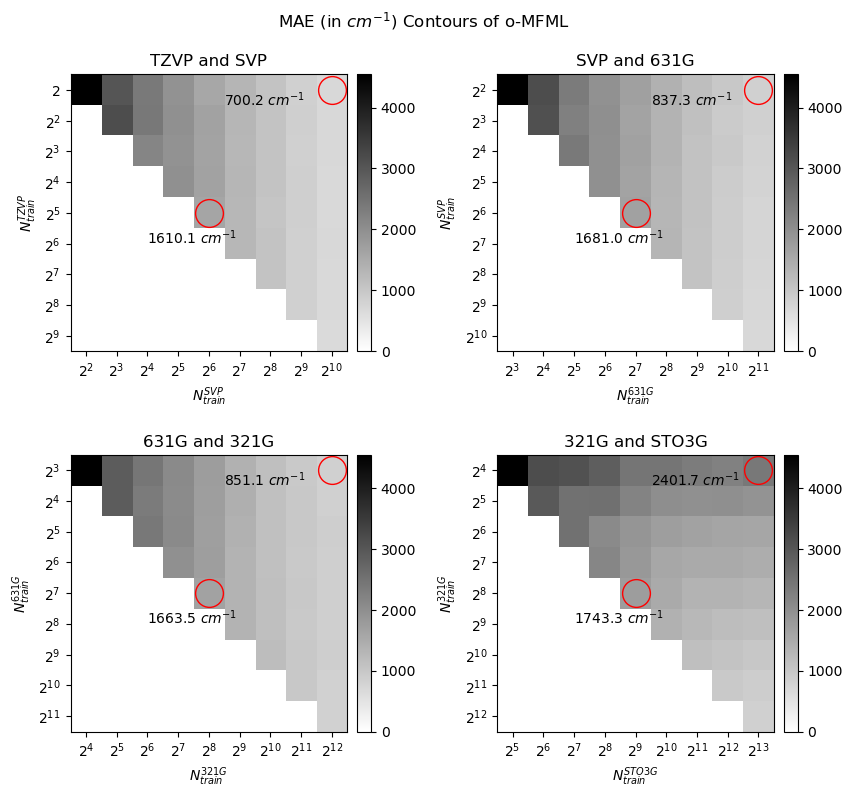

In [8]:
err_contour_plot()
#plt.savefig('plots/error_contours.pdf',format='pdf',bbox_inches='tight',dpi=150)

# Time vs MAE

In [9]:
def MFML_times_special(nmax=12,factor=2):
    mol_IDs = np.load('Data/idx_names.npy')
    all_times = np.zeros((9,5),dtype=float)
    molnames = ['urea','acrolein','alanine','sma',
                'nitrophenol','urocanic',
                'dmabn','thymine','o-hbdi']
    for i in range(9): #loop over molecules in CheMFi
        all_times[i,:] = np.load(f'../CheMFi/dataset/QeMFi_{molnames[i]}.npz',
                                 allow_pickle=True)['t']
    inds = np.load(f'outs/train_indexes_{factor}.npy',allow_pickle=True)[0][:,0]
    train_IDs = np.asarray(mol_IDs[inds],dtype=int)
    train_times = all_times[train_IDs,:]
    
    del inds, train_IDs, mol_IDs
    
    MFML_times = np.zeros((5,nmax-1),dtype=float)
    temp_times = np.zeros((nmax-1),dtype=float)
    
    for f in range(5):
        for n in range(1,nmax):
            temp_times[n-1] += np.sum(train_times[:(factor**f)*(2**n),4-f])
        MFML_times[f,:] = np.copy(temp_times)
    
    return MFML_times/60.0

In [10]:
def ratio_factor_MFML_times(inds, factor = [3,1,2,1],addition=[0,1,0,1,0],nmax=13):
    mol_IDs = np.load('Data/idx_names.npy')
    all_times = np.zeros((9,5),dtype=float)
    molnames = ['urea','acrolein','alanine','sma',
                'nitrophenol','urocanic',
                'dmabn','thymine','o-hbdi']
    for i in range(9): #loop over molecules in CheMFi
        all_times[i,:] = np.load(f'../CheMFi/dataset/QeMFi_{molnames[i]}.npz',
                                 allow_pickle=True)['t']
    
    train_IDs = np.asarray(mol_IDs[inds],dtype=int)
    train_times = all_times[train_IDs,:]
    
    del inds, train_IDs, mol_IDs
    
    MFML_times = np.zeros((5,nmax-1),dtype=float)
    temp_times = np.zeros((nmax-1),dtype=float)
    
    for f in range(5):
        for n in range(1,nmax):
            trainsize=int((2**n)*np.prod(factor[4-f:])) + addition[f]
            temp_times[n-1] += np.sum(train_times[:trainsize,4-f])
        MFML_times[f,:] = np.copy(temp_times)
    return MFML_times/60.0

In [11]:
def train_time_calcs_special(n_trains):
    all_times = np.zeros((9,5),dtype=float)
    molnames = ['urea','acrolein','alanine','sma',
                'nitrophenol','urocanic',
                'dmabn','thymine','o-hbdi']
    for i in range(9): #loop over molecules in CheMFi
        all_times[i,:] = np.load(f'../CheMFi/dataset/QeMFi_{molnames[i]}.npz',
                                 allow_pickle=True)['t']
    idx = np.load('Data/idx_names.npy')[:120000]
    times = []
    for n in range(n_trains.shape[0]):
        n_current = n_trains[n][::-1]
        a = all_times[np.asarray(idx[:n_current[0]],dtype=int)]
        timecost=(a[:n_current[0],0].sum() + a[:n_current[1],1].sum() + a[:n_current[2],2].sum() + a[:n_current[3],3].sum())/60.0
        times.append(timecost)
    return np.asarray(times)

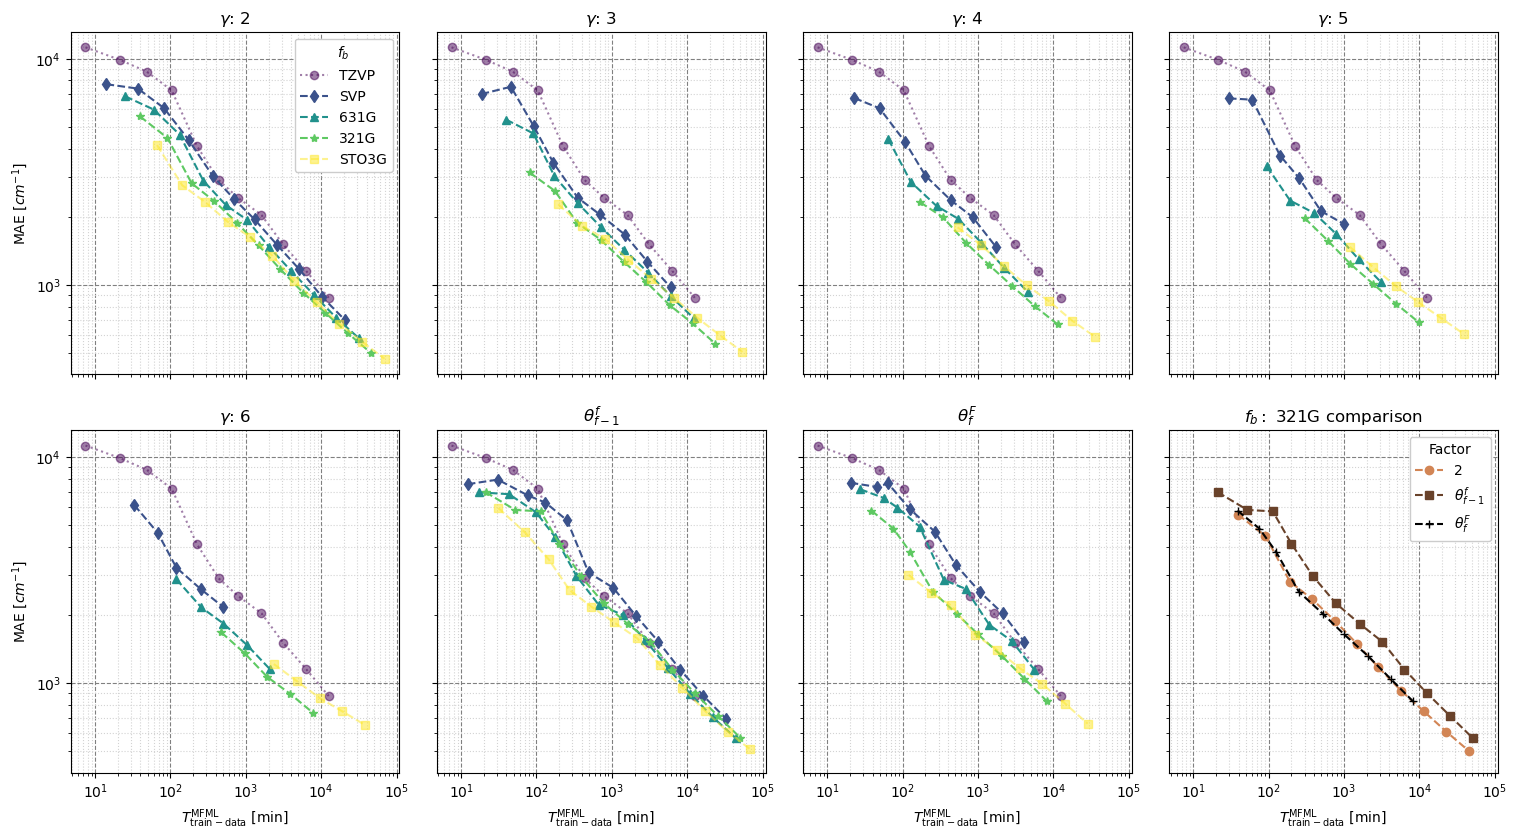

In [12]:
def combined_time_vs_MAE(prop='EV',rep='CM',units='cm^{-1}'):
    sf = np.load(f'outs/sf_mae_{prop}_{rep}.npy')
    
    fids = ['STO3G','321G','631G','SVP','TZVP']
    markers=['s','*','^','d','o']
    colors = plt.cm.viridis(np.linspace(0,1,5))
    
    comcols = plt.cm.copper(np.linspace(0,1,7))
    
    n_list = [12,10,8,7,6]
    
    fig,ax = plt.subplots(2,4,figsize=(15,8),sharey=True,sharex=True)
    fig.tight_layout(h_pad=3)
    ax=ax.flatten('C')
    
    ax[-1].set_title('$f_b:$ 321G comparison')
    
    sf_times = MFML_times_special(nmax=12,factor=2)[0]
    
    m=[]
    t=[]
    for i in range(2,7):
        mae_OLS = np.load(f'outs/ols_mae_{prop}_{rep}_{i}.npy',allow_pickle=True)
        MFML_times = MFML_times_special(nmax=n_list[i-2],factor=i)
        #sf TZVP plot
        ax[i-2].loglog(sf_times, sf,marker=markers[-1],color=colors[0],label='TZVP', alpha=0.5, linestyle=':')
        ax[i-2].set_title('$\gamma$: '+str(i))
        #MFML plots
        for j in range(3,-1,-1):
            alpha=1.0
            if j==0:
                alpha=0.5
            ax[i-2].loglog(MFML_times[4-j],mae_OLS[j],marker=markers[j],color=colors[4-j],linestyle='--',label=fids[j],alpha=alpha)
        if i==2:
            ax[-1].loglog(MFML_times[4-j-1],mae_OLS[j+1],marker='o',color=comcols[4],linestyle='--',label=str(i))
        t.append(MFML_times[4-j-1][0])
        m.append(mae_OLS[j+1][0])
        
    ffm1_OLS = np.load(f'outs/ols_mae_{prop}_{rep}_ffm1ratio.npy',allow_pickle=True)
    target_OLS = np.load(f'outs/ols_mae_{prop}_{rep}_targetratio.npy',allow_pickle=True)
    
    inds_ffm1 = np.load(f'outs/train_indexes_ffm1ratio.npy',allow_pickle=True)[0][:,0]
    ffm1_times = ratio_factor_MFML_times(inds=inds_ffm1, factor = [3,1,2,1],addition=[0,1,0,1,0],nmax=13)
    inds_fF = np.load(f'outs/train_indexes_targetratio.npy',allow_pickle=True)[0][:,0]
    target_times = ratio_factor_MFML_times(inds=inds_fF,factor = [9,3,2,1],addition=[0,1,0,0,0],nmax=10)
    
    
    ax[5].loglog(sf_times, sf, marker=markers[-1],color=colors[0],label='TZVP', alpha=0.5, linestyle=':')
    ax[6].loglog(sf_times, sf, marker=markers[-1],color=colors[0],label='TZVP', alpha=0.5, linestyle=':')
    
    ax[5].set_title(r'$ \theta_{f-1}^f$')
    ax[6].set_title(r'$ \theta_{f}^F$')
    ax[0].set_ylabel(f'MAE [${units}$]')
    ax[4].set_ylabel(f'MAE [${units}$]')
    
    for j in range(3,-1,-1):
        alpha=1.0
        if j==0:
            alpha=0.5
        ax[5].loglog(ffm1_times[4-j],ffm1_OLS[j],marker=markers[j],color=colors[4-j],linestyle='--',label=fids[j], alpha=alpha)
        ax[6].loglog(target_times[4-j],target_OLS[j],marker=markers[j],color=colors[4-j],linestyle='--',label=fids[j], alpha=alpha)
    t.append(ffm1_times[4-j-1][0])
    m.append(ffm1_OLS[j+1][0])
    t.append(target_times[4-j-1][0])
    m.append(target_OLS[j+1][0])
    
    t = np.asarray(t)
    m = np.asarray(m)
    
    t_in = t.argsort()
    t = t[t_in[::-1]]
    m = m[t_in[::-1]]
    
    ax[-1].loglog(ffm1_times[4-j-1],ffm1_OLS[j+1],marker=markers[j],color=comcols[2],linestyle='--',label=r'$\theta_{f-1}^f$')
    ax[-1].loglog(target_times[4-j-1],target_OLS[j+1],marker='+',color=comcols[0],linestyle='--',label=r'$\theta_{f}^F$')
    
    ax[-1].legend(title='Factor',frameon=1.0,framealpha=1.0)
    
    
    y_minor = mticker.LogLocator(base = 2,subs=[5,15,50],numticks=8)#np.arange(1.0,5,2), numticks = 5)
    y_major = mticker.LogLocator(base = 10,subs=[1,10,100],numticks=3)#np.arange(1.0,8,4), numticks = 10)
    
    for i in range(8):
        ax[i].grid(True, axis='both',which="major", ls="--",color='gray')
        ax[i].grid(True, axis='both', which="minor", ls=":",color='lightgray')
        if i>3:
            ax[i].set_xlabel('$T_{\mathrm{train-data}}^{\mathrm{MFML}}$ [min]')
        
    ax[0].legend(title='$f_b$',frameon=1.0, framealpha=1.0)
    
combined_time_vs_MAE()
#plt.savefig('plots/combined_time_vs_mae.pdf',format='pdf',bbox_inches='tight',dpi=150)

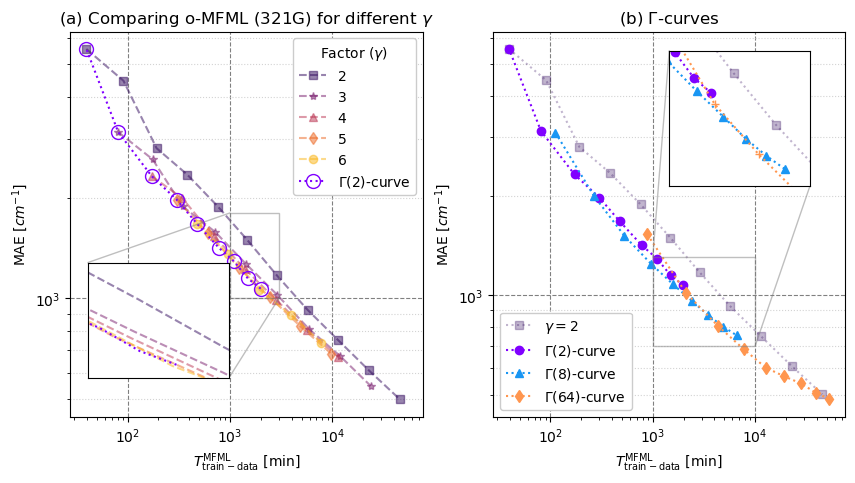

In [13]:
def special_time_vs_mae(prop='EV',rep='CM',units='cm^{-1}',alpha=0.5, inset=True):
    sf = np.load(f'outs/sf_mae_{prop}_{rep}.npy')
    
    fids = ['STO3G','321G','631G','SVP','TZVP']
    markers=['s','*','^','d','o']
    
    comcols = plt.cm.inferno(np.linspace(0,1,7))#plt.cm.copper(np.linspace(0,1,7))
    gamcols = plt.cm.rainbow(np.linspace(0,1,6))#plt.cm.copper(np.linspace(0,1,7))
    
    n_list = [12,10,8,7,6,2,2,2,2]
    
    fig,ax = plt.subplots(1,2,figsize=(10,5),sharey=False,sharex=True)
    
    
    
    if inset:
        axins1 = ax[0].inset_axes([0.05,0.1,0.4,0.3], xticklabels=[], yticklabels=[], 
                                  xticks=[], yticks=[])
        axins2 = ax[1].inset_axes([0.5,0.6,0.4,0.35], xticklabels=[], yticklabels=[], 
                                  xticks=[], yticks=[])
    
    
    m=[]
    t=[]
    t_extra = []
    for i in range(2,11):
        mae_OLS = np.load(f'outs/ols_mae_{prop}_{rep}_{i}.npy',allow_pickle=True)
        MFML_times = MFML_times_special(nmax=n_list[i-2],factor=i)
        for j in range(3,-1,-1):
                pass
        if i<7:    
            ax[0].loglog(MFML_times[4-j-1],mae_OLS[j+1],marker=markers[i-2],color=comcols[i-1],linestyle='--',label=str(i),alpha=alpha)
            if inset:
                axins1.loglog(MFML_times[4-j-1],mae_OLS[j+1],color=comcols[i-1],linestyle='--',label=str(i),alpha=alpha)
            if i==2:
                ax[1].loglog(MFML_times[4-j-1],mae_OLS[j+1],marker=markers[i-2],color=comcols[i-1],linestyle=':',label='$\gamma=$'+str(i),alpha=0.3)
                if inset:
                    axins2.loglog(MFML_times[4-j-1],mae_OLS[j+1],marker=markers[i-2],color=comcols[i-1],linestyle=':',label='$\gamma=$'+str(i),alpha=0.3)
            t.append(MFML_times[4-j-1][0])
            t_extra.append(MFML_times[4-j][0])
            m.append(mae_OLS[j+1][0])
        else:
            t.append(MFML_times[4-j-1][0])
            t_extra.append(MFML_times[4-j][0])
            m.append(mae_OLS[1][0])
    
    
    
    ffm1_OLS = np.load(f'outs/ols_mae_{prop}_{rep}_ffm1ratio.npy',allow_pickle=True)
    target_OLS = np.load(f'outs/ols_mae_{prop}_{rep}_targetratio.npy',allow_pickle=True)
    
    inds_ffm1 = np.load(f'outs/train_indexes_ffm1ratio.npy',allow_pickle=True)[0][:,0]
    ffm1_times = ratio_factor_MFML_times(inds=inds_ffm1, factor = [3,1,2,1],addition=[0,1,0,1,0],nmax=13)
    inds_fF = np.load(f'outs/train_indexes_targetratio.npy',allow_pickle=True)[0][:,0]
    target_times = ratio_factor_MFML_times(inds=inds_fF,factor = [9,3,2,1],addition=[0,1,0,0,0],nmax=10)
    
    
    t = np.asarray(t)
    m = np.asarray(m)
    
    t_in = t.argsort()
    t = t[t_in[::-1]]
    m = m[t_in[::-1]]
    
    
    
    
    n_trains = [[2,4,8,512],
                [2,8,16,1024],
                [2,8,16,2048],
                [2,8,128,4096],
                [2,512,2048,8192]
               ]
    n_trains = np.asarray(n_trains)

    timecost = train_time_calcs_special(n_trains)
    special_mae = np.load('outs/specialtrainsize_LC.npy')[0,:]
    
    m_sto3g = np.load('outs/full_gamma_curve_maes.npy')
    
    
    factors=np.asarray([2,3,4,5,6,7,8,9,10])
    n_trains = []
    for factor in factors:
        n_trains.append(np.asarray([factor**3,factor**2,factor,1])[::-1])
    n_trains = np.asarray(n_trains)
    m_8 = np.load('outs/8_gamma_curve_maes.npy')
    m_16 = np.load('outs/16_gamma_curve_maes.npy')
    m_32 = np.load('outs/32_gamma_curve_maes.npy')
    m_64 = np.load('outs/64_gamma_curve_maes.npy')
    m_8_cost = train_time_calcs_special(8*n_trains)
    m_16_cost = train_time_calcs_special(16*n_trains)
    m_32_cost = train_time_calcs_special(32*n_trains)
    m_64_cost = train_time_calcs_special(64*n_trains)
    
    ax[0].loglog(t,m,marker='o',markersize=10,fillstyle='none',linestyle=':',color=gamcols[0], label='$\Gamma(2)$-curve')
    ax[1].loglog(t,m,marker='o',linestyle=':',color=gamcols[0], label='$\Gamma(2)$-curve')
    ax[1].loglog(m_8_cost,m_8,marker='^',linestyle=':',color=gamcols[1], label='$\Gamma(8)$-curve')
    #ax[1].loglog(m_16_cost,m_16,marker='^',linestyle=':',color=gamcols[2], label='$\Gamma(16)$-curve')
    #ax[1].loglog(m_32_cost,m_32,marker='d',linestyle=':',color=gamcols[3], label='$\Gamma(32)$-curve')
    ax[1].loglog(m_64_cost,m_64,marker='d',linestyle=':',color=gamcols[4], label='$\Gamma(64)$-curve ')
    if inset:
        axins1.loglog(t,m,marker='',markersize=10,fillstyle='none',linestyle=':',color=gamcols[0], label='$\Gamma(2)$-curve')
        axins2.loglog(t,m,marker='o',linestyle=':',color=gamcols[0], label='$\Gamma(2)$-curve')
        axins2.loglog(m_8_cost,m_8,marker='^',linestyle=':',color=gamcols[1], label='$\Gamma(8)$-curve')
        #axins2.loglog(m_16_cost,m_16,marker='^',linestyle=':',color=gamcols[2], label='$\Gamma(16)$-curve')
        #axins2.loglog(m_32_cost,m_32,marker='d',linestyle=':',color=gamcols[3], label='$\Gamma(32)$-curve')
        axins2.loglog(m_64_cost,m_64,marker='+',linestyle=':',color=gamcols[4], label='$\Gamma(64)$-curve')
    
    
    #ax[1].loglog(timecost,special_mae,marker='p',color='r',label='Provisional MFML')
    
    ax[0].legend(title='Factor ($\gamma$)',frameon=1.0,framealpha=1.0)
    ax[1].legend(frameon=1.0,framealpha=1.0)
    
    
    
    y_minor = mticker.LogLocator(base = 2,subs=[5,15,50],numticks=8)#np.arange(1.0,5,2), numticks = 5)
    y_major = mticker.LogLocator(base = 10,subs=[1,10,100],numticks=3)#np.arange(1.0,8,4), numticks = 10)
    
    for i in range(2):
        ax[i].grid(True, axis='both',which="major", ls="--",color='gray')
        ax[i].grid(True, axis='y', which="minor", ls=":",color='lightgray')
        ax[i].set_ylabel('MAE [$cm^{-1}$]')
        ax[i].set_xlabel('$T_{\mathrm{train-data}}^{\mathrm{MFML}}$ [min]')
    #print(timecost)
    ax[0].set_title('(a) Comparing o-MFML (321G) for different $\gamma$')
    ax[1].set_title('(b) $\Gamma$-curves')
    
    axins1.set_xlim(1000,3000)
    axins1.set_ylim(1000,1800)
    ax[0].indicate_inset_zoom(axins1,edgecolor='gray')
    
    axins2.set_xlim(1000,10000)
    axins2.set_ylim(700,1300)
    ax[1].indicate_inset_zoom(axins2,edgecolor='gray')
    
    if inset:
        axins1.get_yaxis().set_visible(False)
        axins1.get_xaxis().set_visible(False)
        axins2.get_yaxis().set_visible(False)
        axins2.get_xaxis().set_visible(False)
    
special_time_vs_mae(alpha=0.5,inset=True)
#plt.savefig('plots/gamma_curves.pdf',format='pdf',bbox_inches='tight',dpi=150)